In [2]:
import xarray as xr
import re
import matplotlib.pyplot as plt

In [3]:
ds=xr.open_dataset('/mnt/nvme2tb/ffp/datasets/images/20211030_df.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:        (y: 1368, x: 1812)
Coordinates:
  * y              (y) float64 41.77 41.76 41.76 41.75 ... 34.73 34.73 34.72
  * x              (x) float64 19.25 19.25 19.26 19.26 ... 28.57 28.57 28.58
Data variables: (12/18)
    dom_dir        (y, x) float32 ...
    dom_vel        (y, x) float32 ...
    res_max        (y, x) float32 ...
    dir_max        (y, x) float32 ...
    mean_dew_temp  (y, x) float32 ...
    min_dew_temp   (y, x) float32 ...
    ...             ...
    ndvi           (y, x) float32 ...
    lst_day        (y, x) float32 ...
    lst_night      (y, x) float32 ...
    fire           (y, x) float32 ...
    weekday        (y, x) float64 ...
    month          (y, x) float64 ...

In [17]:
ds_stat=xr.open_dataset('/mnt/nvme2tb/ffp/datasets/images/static_aft_15.nc')

In [18]:
#if int(d[:4])>=2015:
dsdayall=xr.merge([ds,ds_stat],combine_attrs='drop')
#else:
#    dsdayall=xr.merge([dsday,static_bef15],combine_attrs='drop')

In [19]:
dsdayall

<xarray.Dataset>
Dimensions:        (y: 1368, x: 1812)
Coordinates:
  * y              (y) float64 41.77 41.76 41.76 41.75 ... 34.73 34.73 34.72
  * x              (x) float64 19.25 19.25 19.26 19.26 ... 28.57 28.57 28.58
    band           int64 ...
Data variables: (12/78)
    dom_dir        (y, x) float32 ...
    dom_vel        (y, x) float32 ...
    res_max        (y, x) float32 ...
    dir_max        (y, x) float32 ...
    mean_dew_temp  (y, x) float32 ...
    min_dew_temp   (y, x) float32 ...
    ...             ...
    corine_gr22    (y, x) float32 ...
    corine_gr23    (y, x) float32 ...
    corine_gr24    (y, x) float32 ...
    corine_gr31    (y, x) float32 ...
    corine_gr32    (y, x) float32 ...
    corine_gr33    (y, x) float32 ...

In [20]:
dfday=dsdayall.to_dataframe().reset_index()

In [8]:
dfday

,y,x,dom_dir,dom_vel,res_max,dir_max,mean_dew_temp,min_dew_temp,max_dew_temp,mean_temp,...,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band
0,41.765998,19.245031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,41.765998,19.250186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,41.765998,19.255340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,41.765998,19.260495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,41.765998,19.265649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478811,34.719924,28.559045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2478812,34.719924,28.564199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2478813,34.719924,28.569354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2478814,34.719924,28.574508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
dfday.columns

Index(['y', 'x', 'dom_dir', 'dom_vel', 'res_max', 'dir_max', 'mean_dew_temp',
       'min_dew_temp', 'max_dew_temp', 'mean_temp', 'min_temp', 'max_temp',
       'rain_7_days', 'evi', 'ndvi', 'lst_day', 'lst_night', 'fire', 'weekday',
       'month', 'pop', 'slope', 'road_dens', 'dem', 'curvature', 'aspect',
       'f81', 'frequency', 'corine_13', 'corine_4', 'corine_30', 'corine_38',
       'corine_36', 'corine_10', 'corine_20', 'corine_18', 'corine_16',
       'corine_43', 'corine_27', 'corine_5', 'corine_31', 'corine_17',
       'corine_12', 'corine_26', 'corine_37', 'corine_24', 'corine_28',
       'corine_29', 'corine_19', 'corine_21', 'corine_6', 'corine_23',
       'corine_22', 'corine_1', 'corine_8', 'corine_33', 'corine_2',
       'corine_40', 'corine_32', 'corine_41', 'corine_3', 'corine_25',
       'corine_35', 'corine_14', 'corine_42', 'corine_11', 'corine_44',
       'corine_15', 'corine_7', 'corine_9', 'corine_gr1', 'corine_gr4',
       'corine_gr5', 'corine_gr21', 'corine

In [21]:
#fill corine nan with 0
for c in dfday.columns:
    if re.search('corine_\d+',c):
        dfday[c].fillna(0, inplace=True)

In [22]:
#drop curvature
dfday.drop(columns=['curvature'],inplace=True)
#dfday.drop(columns=['curvature','pop'],inplace=True)

In [23]:
dt1=dfday.dropna(thresh=79)

In [24]:
dt1

,y,x,dom_dir,dom_vel,res_max,dir_max,mean_dew_temp,min_dew_temp,max_dew_temp,mean_temp,...,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band
72,41.765998,19.616149,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
73,41.765998,19.621303,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
74,41.765998,19.626457,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
75,41.765998,19.631612,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
76,41.765998,19.636766,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443521,34.817857,24.115946,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.037921,0.0,0.0,0.0,0.0,0.0,0.537002,0.425077,1
2445332,34.812703,24.110792,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.037931,0.962069,1
2445334,34.812703,24.121100,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008493,0.991507,1
2445335,34.812703,24.126255,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.451182,0.0,0.0,0.0,0.0,0.0,0.000000,0.548818,1


In [33]:
dfday.dropna()

,y,x,dom_dir,dom_vel,res_max,dir_max,mean_dew_temp,min_dew_temp,max_dew_temp,mean_temp,...,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band
684,41.765998,22.770646,2.0,1.012128,1.012128,2.0,273.907043,271.258667,275.815338,278.932159,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
685,41.765998,22.775800,2.0,1.012128,1.012128,2.0,273.907043,271.258667,275.815338,278.932159,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
686,41.765998,22.780955,2.0,1.012128,1.012128,2.0,273.907043,271.258667,275.815338,278.932159,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
687,41.765998,22.786109,2.0,1.012128,1.012128,2.0,273.907043,271.258667,275.815338,278.932159,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
688,41.765998,22.791263,2.0,1.012128,1.012128,2.0,273.907043,271.258667,275.815338,278.932159,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443521,34.817857,24.115946,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.037921,0.0,0.0,0.0,0.0,0.0,0.537002,0.425077,1
2445332,34.812703,24.110792,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.037931,0.962069,1
2445334,34.812703,24.121100,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008493,0.991507,1
2445335,34.812703,24.126255,0.0,2.450395,3.121281,1.0,286.710236,285.540405,287.558289,292.200165,...,0.0,0.451182,0.0,0.0,0.0,0.0,0.0,0.000000,0.548818,1


In [25]:
for c in dt1.columns:
    print(c,dt1[c].isna().sum())

y 0
x 0
dom_dir 0
dom_vel 0
res_max 0
dir_max 0
mean_dew_temp 0
min_dew_temp 0
max_dew_temp 0
mean_temp 0
min_temp 0
max_temp 0
rain_7_days 0
evi 0
ndvi 0
lst_day 883
lst_night 2
fire 0
weekday 0
month 0
pop 215004
slope 0
road_dens 0
dem 3033
aspect 0
f81 0
frequency 0
corine_13 0
corine_4 0
corine_30 0
corine_38 0
corine_36 0
corine_10 0
corine_20 0
corine_18 0
corine_16 0
corine_43 0
corine_27 0
corine_5 0
corine_31 0
corine_17 0
corine_12 0
corine_26 0
corine_37 0
corine_24 0
corine_28 0
corine_29 0
corine_19 0
corine_21 0
corine_6 0
corine_23 0
corine_22 0
corine_1 0
corine_8 0
corine_33 0
corine_2 0
corine_40 0
corine_32 0
corine_41 0
corine_3 0
corine_25 0
corine_35 0
corine_14 0
corine_42 0
corine_11 0
corine_44 0
corine_15 0
corine_7 0
corine_9 0
corine_gr1 0
corine_gr4 0
corine_gr5 0
corine_gr21 0
corine_gr22 0
corine_gr23 0
corine_gr24 0
corine_gr31 0
corine_gr32 0
corine_gr33 0
band 0


In [26]:
dt1[dt1['pop'].isna()]

,y,x,dom_dir,dom_vel,res_max,dir_max,mean_dew_temp,min_dew_temp,max_dew_temp,mean_temp,...,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band
72,41.765998,19.616149,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
73,41.765998,19.621303,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
74,41.765998,19.626457,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
75,41.765998,19.631612,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
76,41.765998,19.636766,0.0,2.489071,2.489071,3.0,278.291229,277.042450,281.201691,285.156250,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907666,36.343562,26.677686,0.0,5.619540,5.713376,1.0,283.291656,282.395233,284.125793,291.188080,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.318797,0.681203,1
1907667,36.343562,26.682841,0.0,5.619540,5.713376,1.0,283.291656,282.395233,284.125793,291.188080,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.856591,0.143409,1
1909477,36.338408,26.672532,0.0,3.104859,3.104859,4.0,287.365082,285.745819,288.374115,291.299591,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.135322,0.864678,1
1909478,36.338408,26.677686,0.0,3.104859,3.104859,4.0,287.365082,285.745819,288.374115,291.299591,...,0.0,0.056238,0.0,0.0,0.0,0.0,0.0,0.000000,0.943762,1


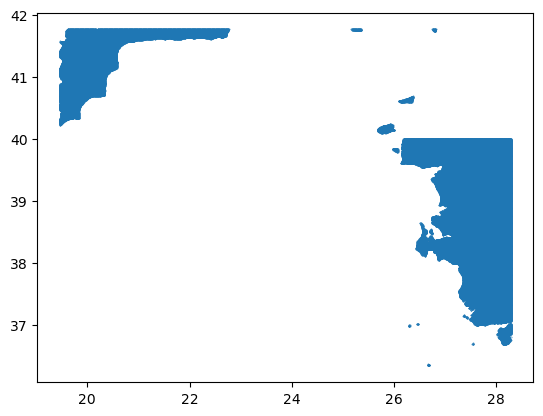

In [32]:
plt.scatter(dt1[dt1['pop'].isna()]['x'], dt1[dt1['pop'].isna()]['y'],s=0.1)

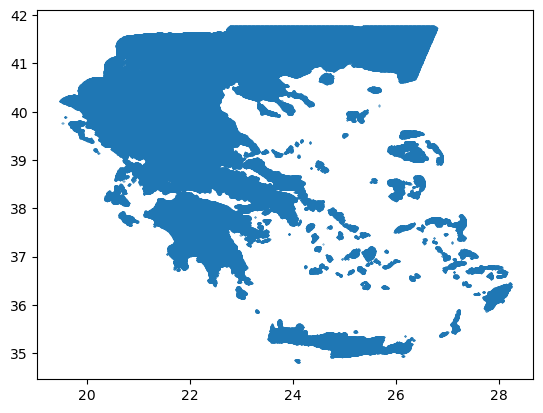

In [31]:
plt.scatter(dt1[~dt1['pop'].isna()]['x'], dt1[~dt1['pop'].isna()]['y'], s=0.1)